## **Importing Necessary Libraries**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [10]:
train = pd.read_csv(r"C:\Users\Lenovo\Downloads\Titanic - Titanic Train.csv.csv")
train.head() 

test = pd.read_csv(r"C:\Users\Lenovo\Downloads\Titanic test.csv")
test.head() 
                         

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **EDA**

#### Categorical Attributes

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\1454842793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(survived,palette='viridis')


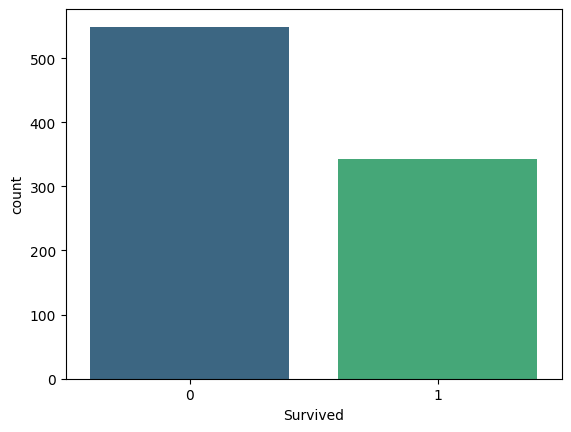

In [13]:
survived = train['Survived'].value_counts() 
sns.barplot(survived,palette='viridis')
plt.show() 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\1007655105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pclass,palette='viridis')


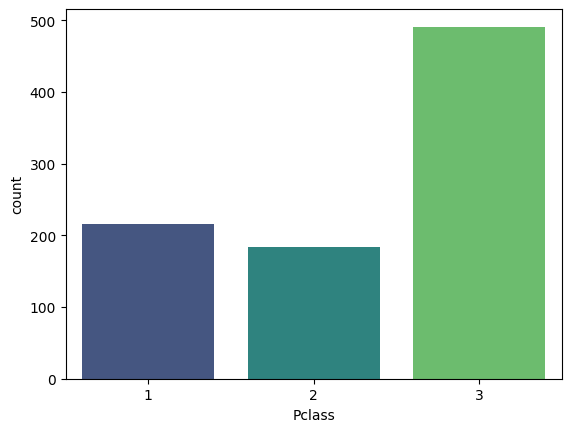

In [14]:
pclass = train['Pclass'].value_counts() 
sns.barplot(pclass,palette='viridis')
plt.show() 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\3376501210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(sex,palette='viridis')


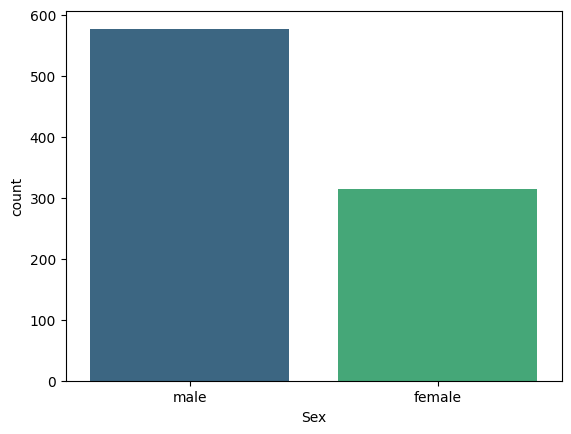

In [15]:
sex = train['Sex'].value_counts() 
sns.barplot(sex,palette='viridis')
plt.show() 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\2212767121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(sibsp,palette='viridis')


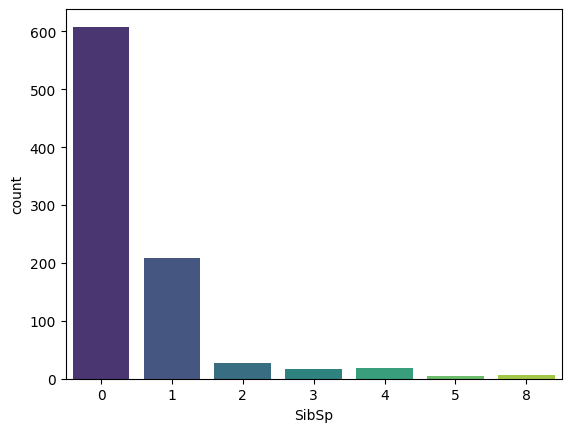

In [16]:
sibsp = train['SibSp'].value_counts() 
sns.barplot(sibsp,palette='viridis')
plt.show() 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\2715934788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(parch,palette='viridis')


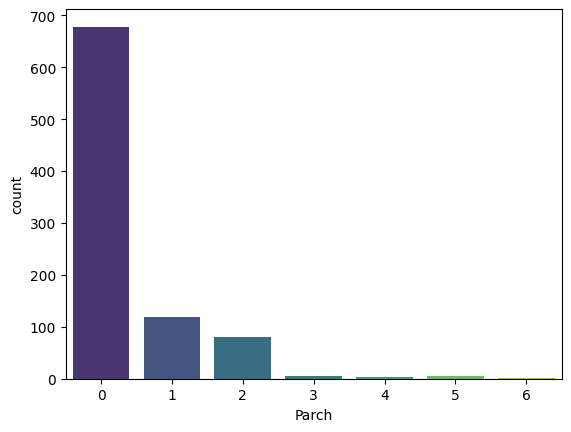

In [17]:
parch = train['Parch'].value_counts() 
sns.barplot(parch,palette='viridis')
plt.show() 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\1545055541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(embarked,palette='viridis')


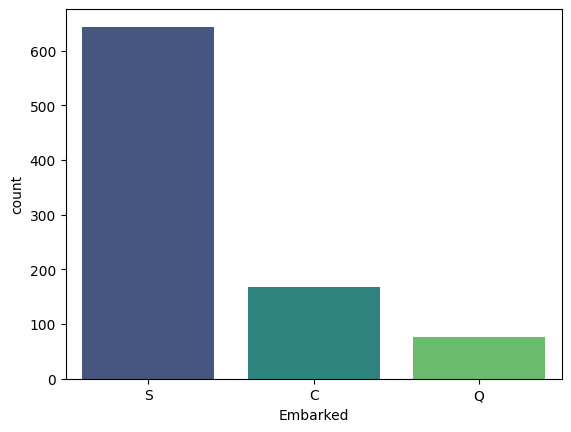

In [18]:
embarked = train['Embarked'].value_counts() 
sns.barplot(embarked,palette='viridis')
plt.show() 

#### Numerical Attributes

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\1150829313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


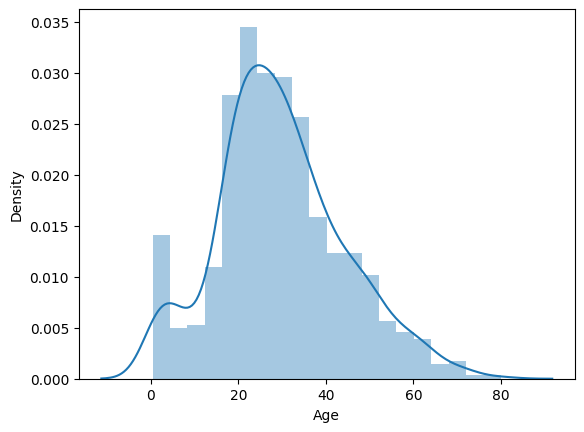

In [19]:
sns.distplot(train['Age'])
plt.show() 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\2159662402.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'])


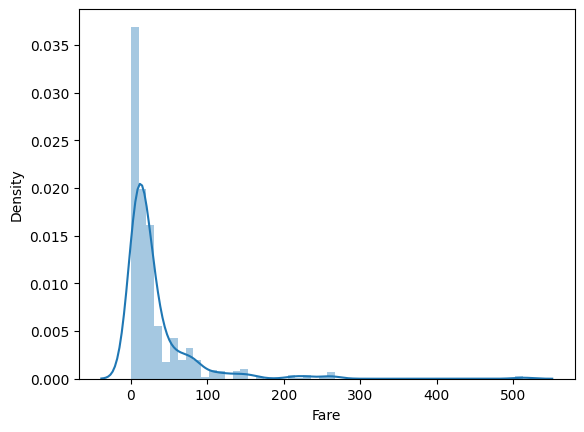

In [20]:
sns.distplot(train['Fare'])
plt.show() 

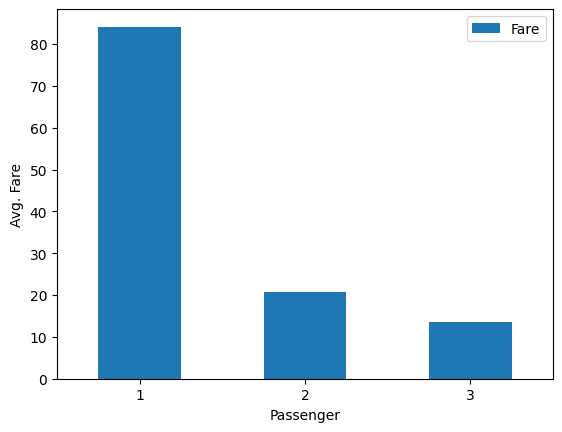

In [21]:
class_Fare = train.pivot_table(index='Pclass', values='Fare')
class_Fare.plot(kind='bar')
plt.xlabel('Passenger')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

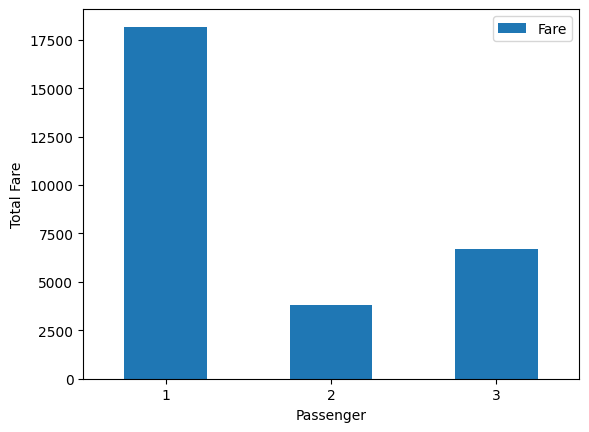

In [22]:
class_Fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_Fare.plot(kind='bar')
plt.xlabel('Passenger')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\4189931749.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df, x = 'Pclass' , y = 'Fare' , hue = 'Survived', ci = False)


<Axes: xlabel='Pclass', ylabel='Fare'>

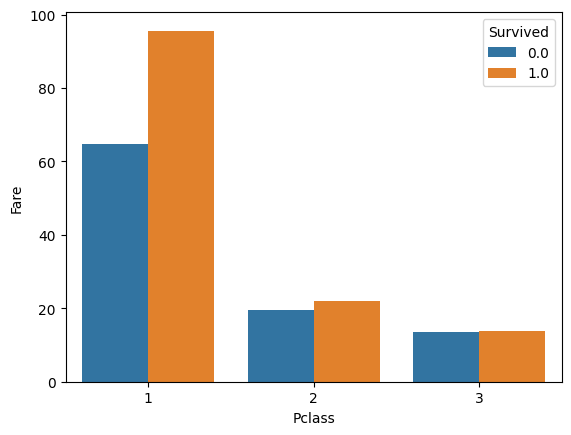

In [25]:
sns.barplot(data = df, x = 'Pclass' , y = 'Fare' , hue = 'Survived', ci = False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\524907134.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df, x = 'Survived' , y = 'Fare' , hue = 'Pclass', ci = False)


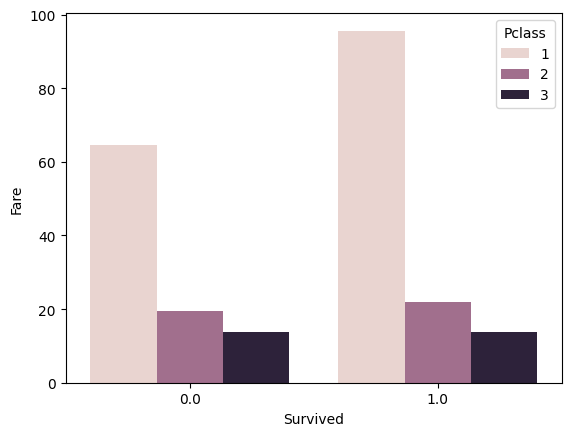

In [26]:
sns.barplot(data = df, x = 'Survived' , y = 'Fare' , hue = 'Pclass', ci = False) 
plt.show() 

## **DATA PREPROCESSING**

#### Combine train and test dataframes

In [24]:
train_len = len(train)

df = pd.concat([train,test], axis=0)
df = df.reset_index()
df.drop('index',axis=1,inplace=True) 
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train_len

891

In [ ]:
df.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [28]:
test.shape

(418, 11)

In [29]:
df.shape 

(1309, 12)

#### Find the Null Values.

In [30]:
df.isnull().sum() 

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### Droping irrelevant columns

In [31]:
df.drop(columns=['Cabin'],axis=1,inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### Filling missing values using mean of that numerical column

In [32]:
print(df['Age'].mean())
print(df['Fare'].mean())   

29.881137667304014
33.29547928134557


In [33]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Age'].mean())

#### Filling missing values using mode of that categorical column

In [34]:
df['Embarked'].mode()[0] 

'S'

In [35]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#### Log Transformation for uniform data distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\260077136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


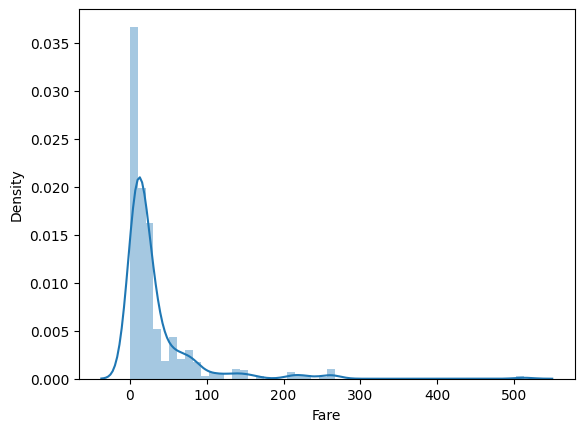

In [36]:
sns.distplot(df['Fare'])
plt.show()      

In [37]:
df['Fare'] = np.log(df['Fare'] + 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19956\3907273366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


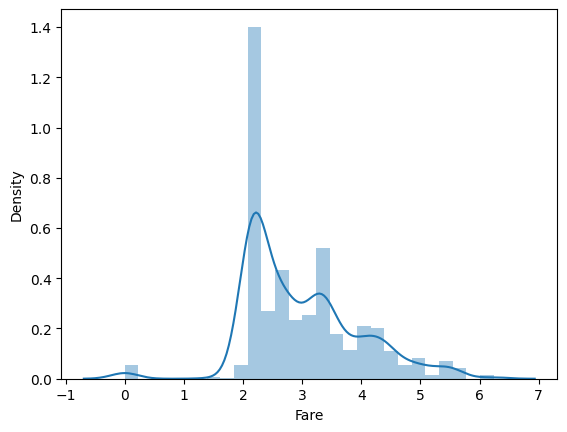

In [38]:
sns.distplot(df['Fare'])
plt.show()    

## **Correlation Matrix**

In [39]:
df.select_dtypes('number').corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025731,-0.055224,0.008942,0.020075
Survived,-0.005007,1.000000,-0.338481,-0.070323,-0.035322,0.081629,0.329862
Pclass,-0.038354,-0.338481,1.000000,-0.366371,0.060832,0.018322,-0.685432
Age,0.025731,-0.070323,-0.366371,1.000000,-0.190747,-0.130872,0.174014
SibSp,-0.055224,-0.035322,0.060832,-0.190747,1.000000,0.373587,0.311387
Parch,0.008942,0.081629,0.018322,-0.130872,0.373587,1.000000,0.323303
Fare,0.020075,0.329862,-0.685432,0.174014,0.311387,0.323303,1.000000


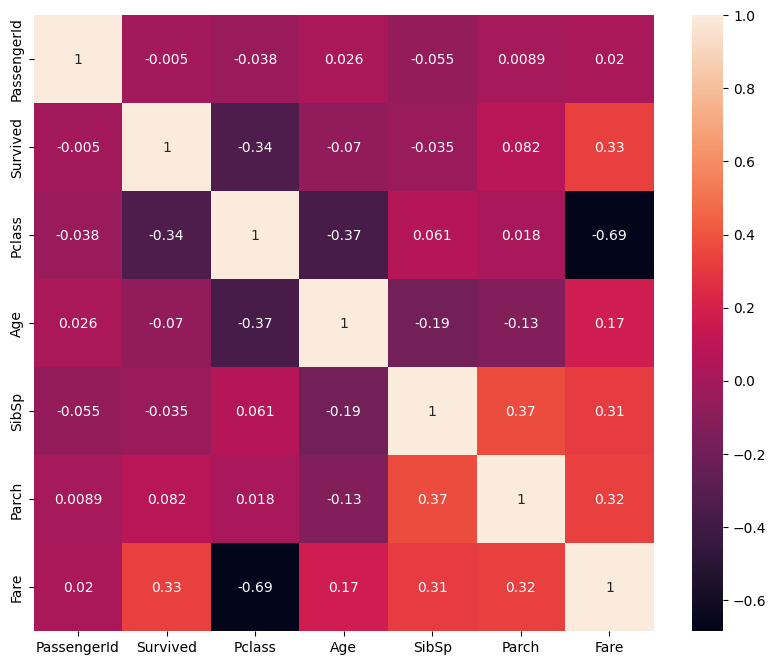

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True)
plt.show() 

In [41]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


#### Dropping unnecessary columns

In [43]:
df.drop(columns=['Name','Ticket'],axis=1,inplace=True)
df.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


#### Label Encoding

In [44]:
cols = ['Sex','Embarked']
encoder = LabelEncoder() 

for col in cols:
    df[col] = encoder.fit_transform(df[col])
df.head() 


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


## **Train Test Split**

In [45]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [46]:
train.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [47]:
test.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


#### Input Split

In [48]:
x = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']  

In [49]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [50]:
y.head() 

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

## **Model Training**

In [51]:
def classify(model):
    x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train) 
    print("Accuracy score: ", model.score(x_test, y_test))
    score = cross_val_score(model, x , y , cv = 5)
    print('CV Score: ', np.mean(score))

In [58]:
model = LogisticRegression()

classify(model) 

Accuracy score:  0.8071748878923767
CV Score:  0.7833971502102819


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
model = DecisionTreeClassifier()

classify(model) 

Accuracy score:  0.7443946188340808
CV Score:  0.7722176887828762


In [54]:
model = RandomForestClassifier()

classify(model)

Accuracy score:  0.8026905829596412
CV Score:  0.8103571652752495


In [56]:
model = KNeighborsClassifier()

classify(model) 

Accuracy score:  0.7802690582959642
CV Score:  0.7744397715146569


## **Model Training with Full Data**

In [59]:
model = RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [68]:
test.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


#### Input Split foe Test Data

In [65]:
x_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [66]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


In [67]:
pred = model.predict(x_test)
pred

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

## **Test Submission**

In [117]:
passenger_id = test['PassengerId']
passenger_id

891      892
892      893
893      894
894      895
895      896
        ... 
1304    1305
1305    1306
1306    1307
1307    1308
1308    1309
Name: PassengerId, Length: 418, dtype: int64

In [119]:
survived = list(pred)
survived

[0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0

In [ ]:
sub = 